https://medium.com/@adrianovalexey/раз-и-навсегда-как-автоматизировать-построение-когорт-с-python-и-pandas-74f2c38dd3f7

На вход подаем файл содержащий столбцы со значениями:

* Client_ID — идентификаторы клиентов
* OrderDTE — содержит для клиентов даты целевых действий(покупка, публикация, твит, шер итп.), по которым будете строить когорту. Обратите внимание на формат.
* Revenue — показывающее сумму выручки от операции.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

# это чтобы графики строились непосредственно в блокноте iPython
%matplotlib inline 

# читаем файл
df = pd.read_excel('/Users/stellarnode/OneDrive/MTS/mts innovation center/crm/reports/pay_20181127190504.xls')

df['firstPaymentDTE'] = df["Дата"].apply(lambda x: pd.to_datetime(x))

# Если считать по платежам, используй первую строчку ниже (из следующих трех). Если считать по учтенным в бухгалтерии доходам - вторую и третью. Не используемые строчки - закомментируй.
df = df.rename(index = str, columns={"Учащийся": "ClientID", "Дата": "orderDTE", "Сумма": "Revenue"})
# df = df.rename(index = str, columns={"ID клиента": "ClientID", "Расчетный период": "orderDTE", "Стоимость оказанных услуг за расчетный период, руб.": "Revenue"})
# df['orderDTE'] = df['orderDTE'].apply(lambda x: x.strftime('%Y-%m'))

df.head()


,ID,orderDTE,Тип операции,Счет (касса),Статья,Revenue,ClientID,Преподаватель,Товар,Комментарий,Плательщик,firstPaymentDTE
0,170,24.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,399.0,Шафорост Марина,NaN,NaN,1 урок ПРОМО+,Марина Шафорост,2018-11-24
1,169,24.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,399.0,Федулова Майя,NaN,NaN,1 урок ПРОМО+,Майя Федулова,2018-11-24
2,168,24.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,17940.0,Зайцев Вячеслав,NaN,NaN,40 уроков ПРОМО+,Вячеслав Зайцев,2018-11-24
3,167,24.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,5233.0,Шубин Максим,NaN,NaN,10 уроков ПРОМО+,Максим Шубин,2018-11-24
4,166,23.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,399.0,Исакова Дина,NaN,NaN,1 урок ПРОМО+,Дина Исакова,2018-11-23


In [2]:
# Добавим столбец OrderPeriod для дальнейшей группировки данных
# df['OrderPeriod'] = df.orderDTE.apply(lambda x: x.strftime('%Y-%m'))
df['OrderPeriod'] = df.orderDTE.apply(lambda x: x[:7])
df.head()

,ID,orderDTE,Тип операции,Счет (касса),Статья,Revenue,ClientID,Преподаватель,Товар,Комментарий,Плательщик,firstPaymentDTE,OrderPeriod
0,170,24.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,399.0,Шафорост Марина,NaN,NaN,1 урок ПРОМО+,Марина Шафорост,2018-11-24,24.11.2
1,169,24.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,399.0,Федулова Майя,NaN,NaN,1 урок ПРОМО+,Майя Федулова,2018-11-24,24.11.2
2,168,24.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,17940.0,Зайцев Вячеслав,NaN,NaN,40 уроков ПРОМО+,Вячеслав Зайцев,2018-11-24,24.11.2
3,167,24.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,5233.0,Шубин Максим,NaN,NaN,10 уроков ПРОМО+,Максим Шубин,2018-11-24,24.11.2
4,166,23.11.2018,Доход,Сопровождение SmartU — Основная касса,NaN,399.0,Исакова Дина,NaN,NaN,1 урок ПРОМО+,Дина Исакова,2018-11-23,23.11.2


In [3]:
#добавим индекс в dataFrame по ClientID
df.set_index('ClientID', inplace=True)

In [4]:
# Здесь тоже можно выбрать первую или вторую строчки в зависимости от чего учет. По платежам (авансам) - первая. По учету в бухгалтерии - вторая.

# df['JoinMonth'] = df.groupby(level=0)['orderDTE'].min().apply(lambda x: x.strftime('%Y-%m')) #добавим столбец JoinMonth
df['JoinMonth'] = df.groupby(level=0)['firstPaymentDTE'].min().apply(lambda x: x.strftime('%Y-%m')) #добавим столбец JoinMonth

df.reset_index(inplace=True) #переиндексируем df

df.insert(len(df.columns), "TotalOrders", 0, allow_duplicates=False) #создадим столбец в котором далее поместим количество заказов


In [5]:
df.tail()

,ClientID,ID,orderDTE,Тип операции,Счет (касса),Статья,Revenue,Преподаватель,Товар,Комментарий,Плательщик,firstPaymentDTE,OrderPeriod,JoinMonth,TotalOrders
97,Бекиров Сеймур,75,01.07.2018,Доход,Сопровождение SmartU — Основная касса,NaN,20.0,NaN,NaN,5 уроков МИНИ,Татьяна Бекирова (Румянцева),2018-01-07,01.07.2,2018-01,0
98,Полякова Светлана,74,30.06.2018,Доход,Сопровождение SmartU — Основная касса,NaN,20.0,NaN,NaN,5 уроков МИНИ,Елена Полякова,2018-06-30,30.06.2,2018-06,0
99,Салимов Кирилл,70,18.06.2018,Доход,Сопровождение SmartU — Основная касса,NaN,20.0,NaN,NaN,5 уроков МИНИ,Татьяна Сударикова,2018-06-18,18.06.2,2018-03,0
100,Давыдов Сергей,68,07.06.2018,Доход,Сопровождение SmartU — Основная касса,NaN,20.0,NaN,NaN,5 уроков МИНИ (20.00 р. за 5 шт. по 60 мин.),Сергей Давыдов,2018-07-06,07.06.2,2018-05,0
101,Давыдов Сергей,69,31.05.2018,Доход,Сопровождение SmartU — Основная касса,NaN,20.0,NaN,NaN,5 уроков МИНИ (20.00 р. за 5 шт. по 60 мин.),Сергей Давыдов,2018-05-31,31.05.2,2018-05,0


In [6]:
#свернем данные в когорты
grouped = df.groupby(['JoinMonth', 'OrderPeriod'])

# количество уникальных пользователей и общее количество заказов и выручка за период
cohorts = grouped.agg({'ClientID': pd.Series.nunique,
                       'TotalOrders': pd.Series.count, 
                       'Revenue': np.sum})

# переименуем некоторые столбцы для большего понимания
cohorts.rename(columns={'ClientID': 'TotalUsers',
                        'TotalOrders': 'TotalOrders'}, inplace=True)

# добавим ярлык для периодов
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)

#посчитаем retention

# переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['JoinMonth','CohortPeriod'], inplace=True)

# создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohorts['TotalUsers'].unstack(0)
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

Text(0,0.5,'% of Cohort Purchasing')

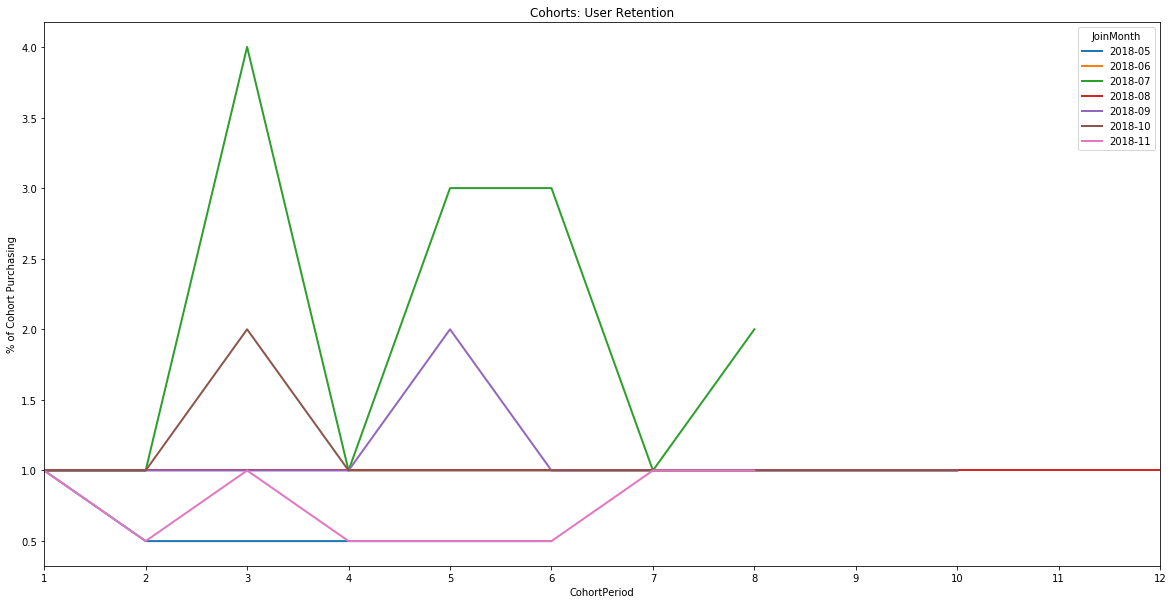

In [7]:

user_retention[['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11']].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1)) # разбивка оси X
plt.xlim(1, 12) #ось X
plt.ylabel('% of Cohort Purchasing')

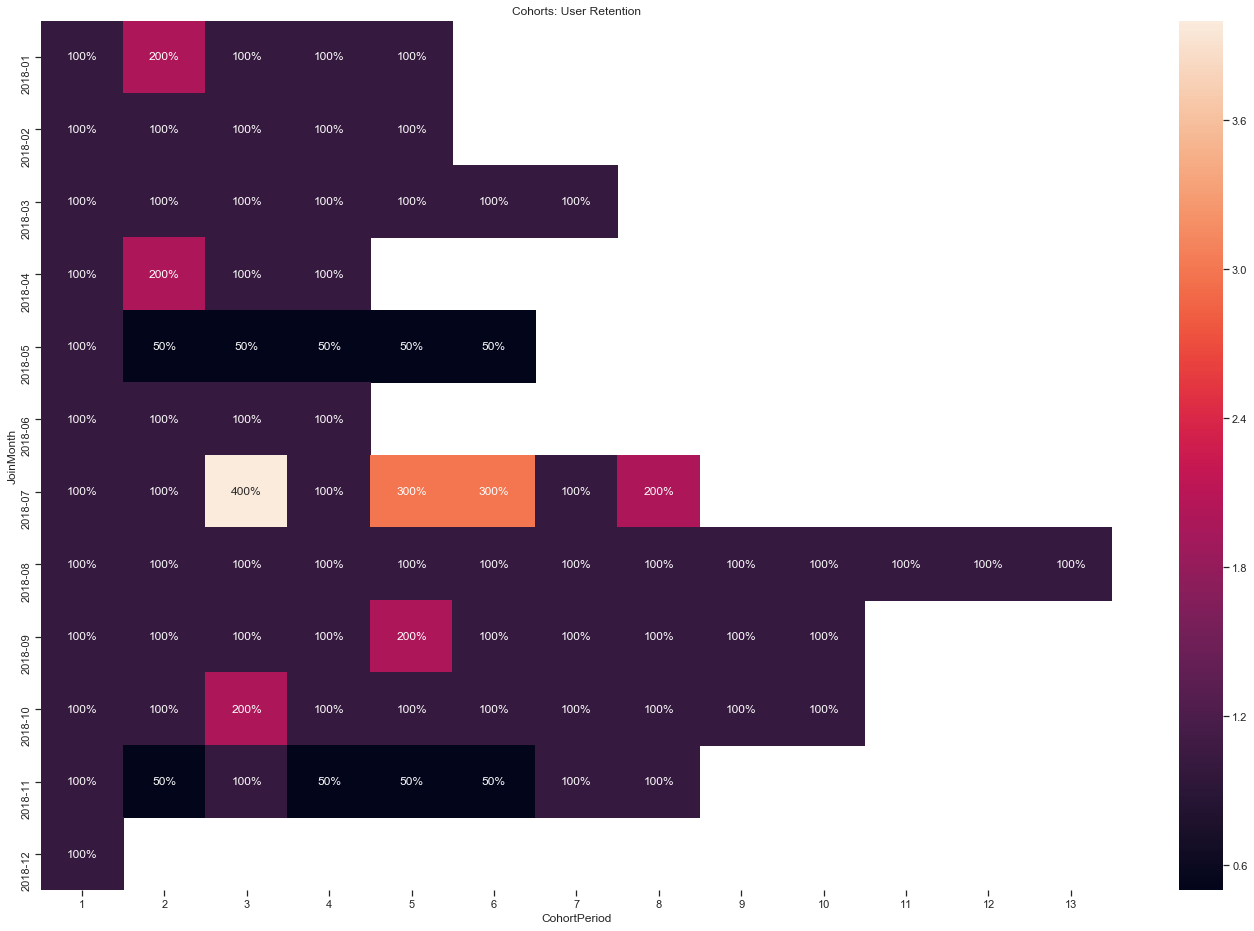

In [8]:

import seaborn as sns
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.00%')

Text(0,0.5,'% of Cohort Purchasing')

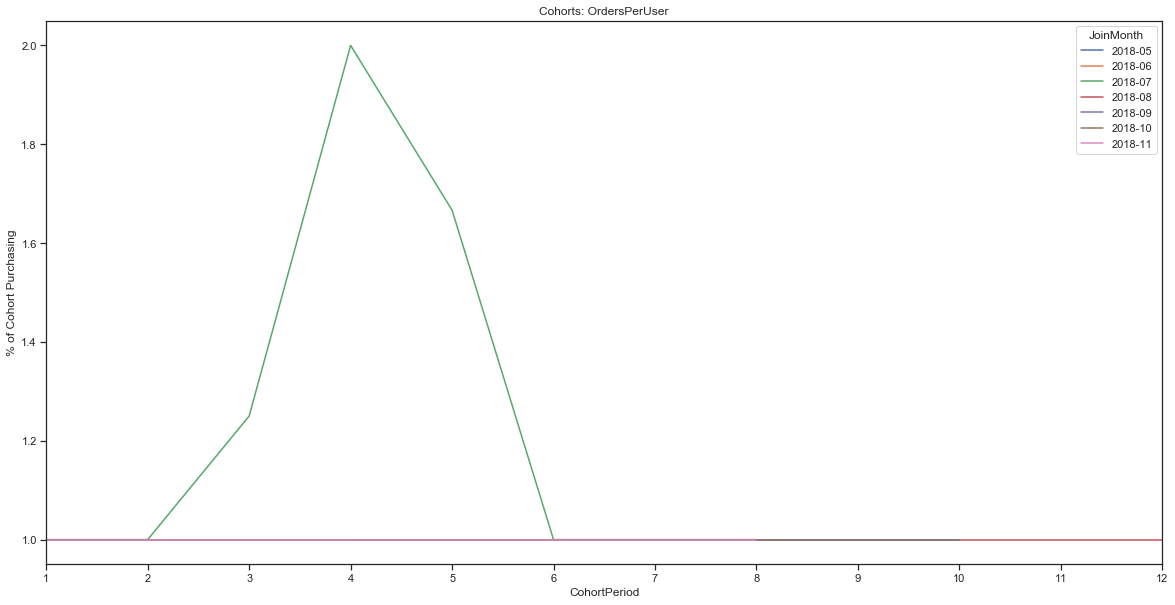

In [10]:

## Расчитаем частоту покупок по когортам
c = cohorts['TotalOrders']/cohorts['TotalUsers']
opc = c.unstack(0)

opc[['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11']].plot(figsize=(20,10))
plt.title('Cohorts: OrdersPerUser')
plt.xticks(np.arange(1, 12.1, 1)) # разбивка оси X
plt.xlim(1, 12) #ось X
plt.ylabel('% of Cohort Purchasing')

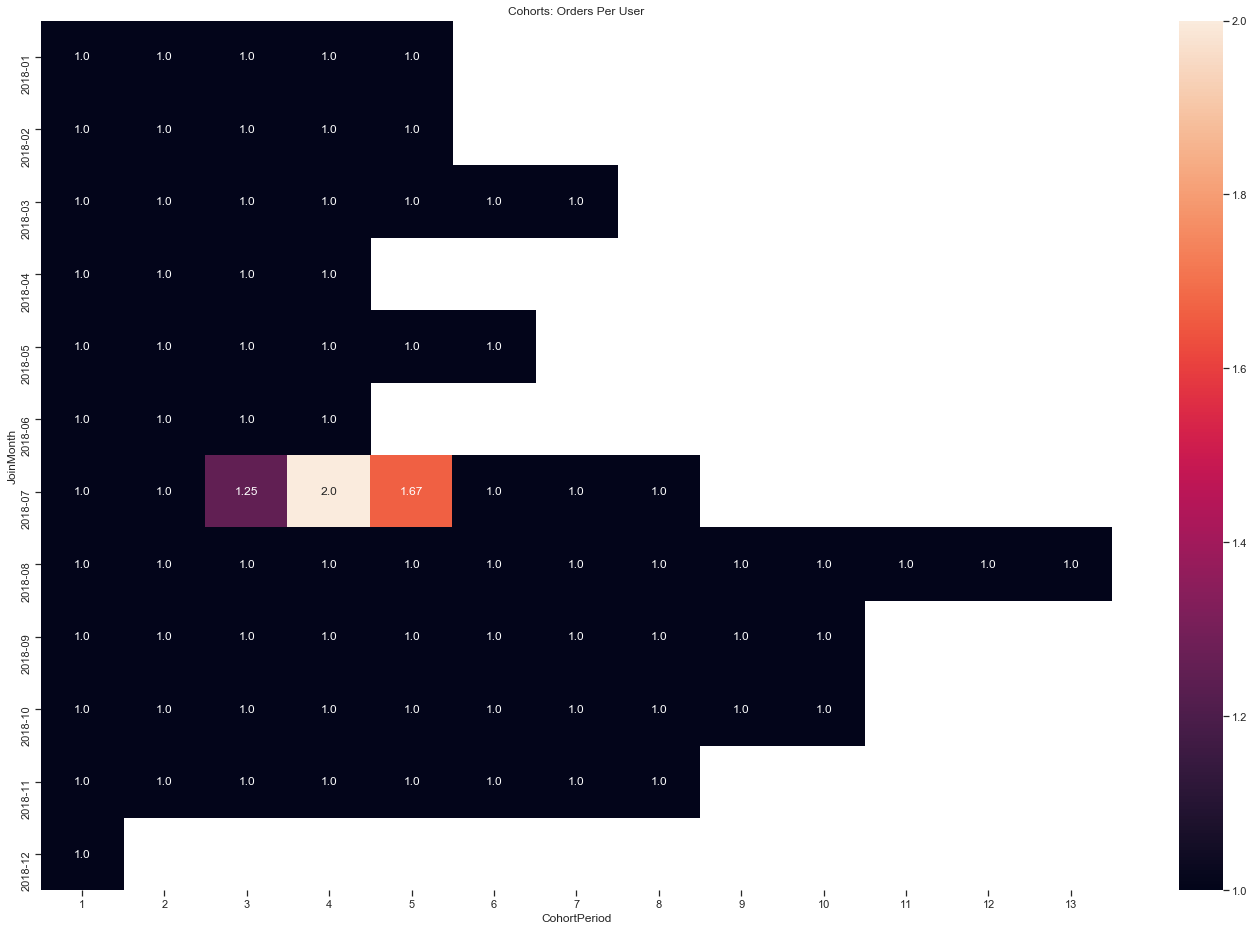

In [11]:

#cohortsOPC = cohorts['TotalOrders']/cohorts['TotalUsers']

import seaborn as sns
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: Orders Per User')
sns.heatmap(opc.T, mask=opc.T.isnull(), annot=True, fmt='.3')